In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn(scikit-learn) 모듈의 neighnors 하위 모듈에서 KNeighborsClassifier 클래스를 임포트
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
path = 'http://raw.githubusercontent.com/JakeOh/202505_BD50/refs/heads/main/datasets/fish.csv'

In [ ]:
fish = pd.read_csv(path)
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


# 데이터 탐색

In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
fish.Species.value_counts()

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


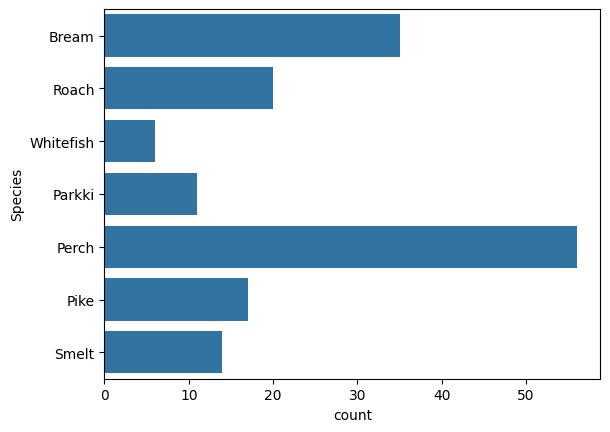

In [ ]:
sns.countplot(data = fish, y = 'Species')
plt.show()

# 어종을 제외한 5개 변수의 boxplot, histogram

## 숫자 타입 변수 탐색

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


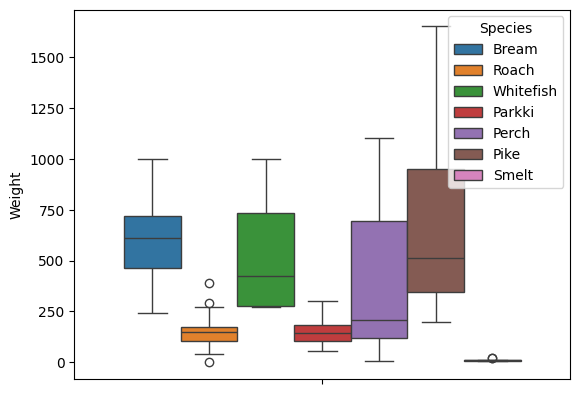

In [ ]:
# weight boxplot
sns.boxplot(data = fish, y = 'Weight', hue = 'Species')
plt.show()

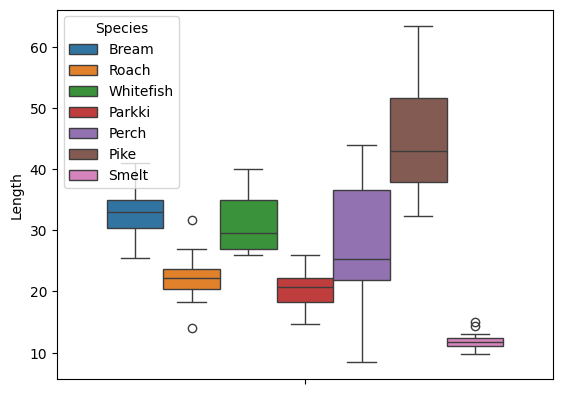

In [ ]:
# length boxplot
sns.boxplot(data = fish, y = 'Length', hue = 'Species')
plt.show()

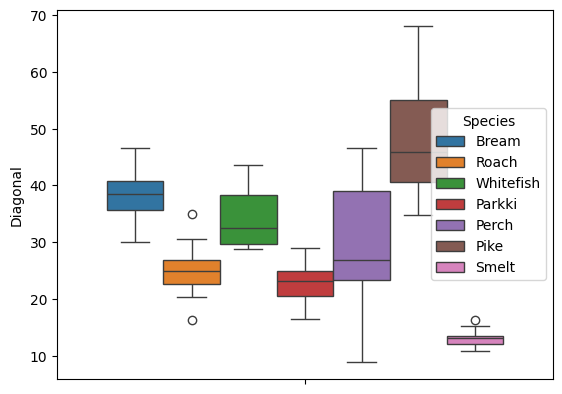

In [ ]:
# Diagonal boxplot
sns.boxplot(data = fish, y = 'Diagonal', hue = 'Species')
plt.show()

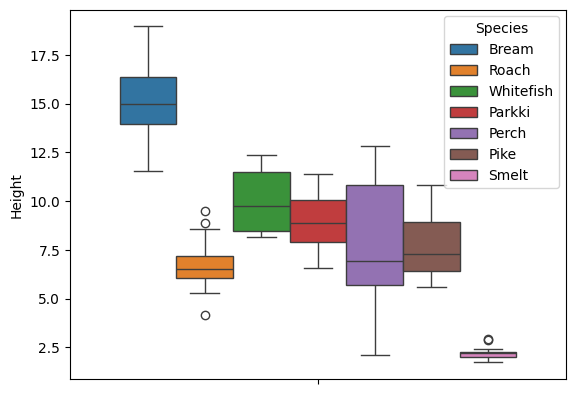

In [ ]:
# Height boxplot
sns.boxplot(data = fish, y = 'Height', hue = 'Species')
plt.show()

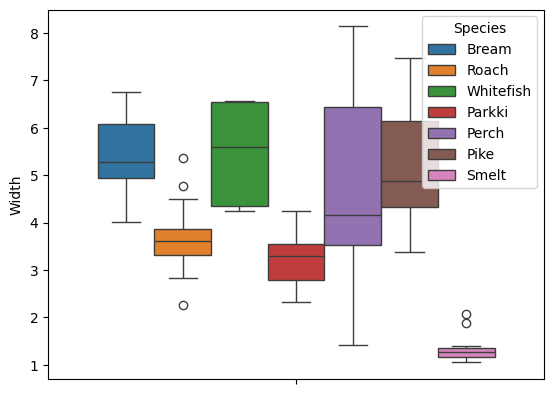

In [ ]:
# Width boxplot
sns.boxplot(data = fish, y = 'Width', hue = 'Species')
plt.show()

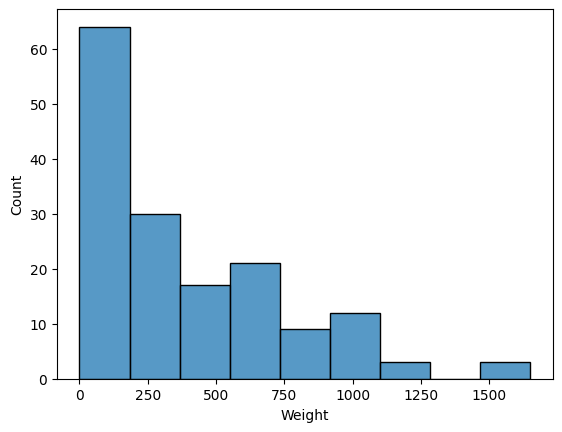

In [ ]:
# weight histogram
sns.histplot(data = fish, x = 'Weight')
plt.show()

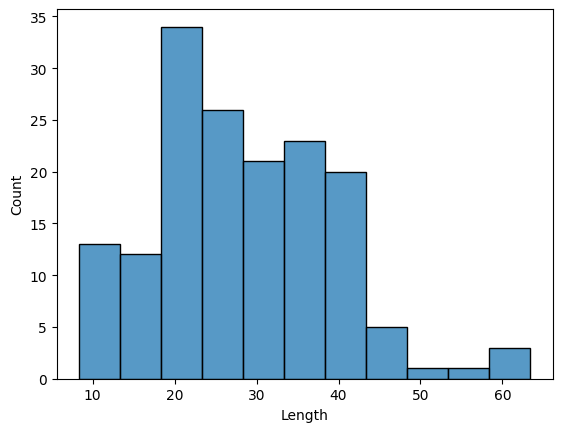

In [ ]:
# Length histogram
sns.histplot(data = fish, x = 'Length')
plt.show()

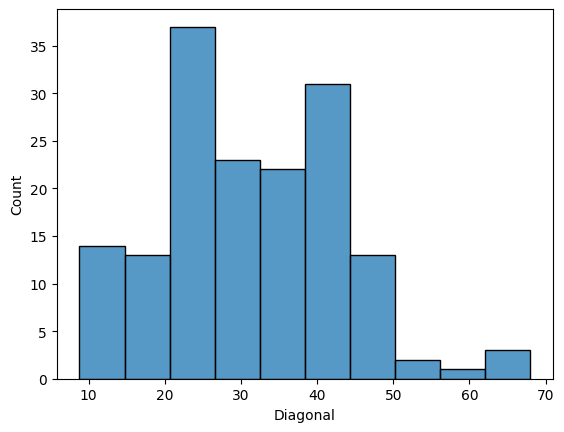

In [ ]:
# Diagonal histogram
sns.histplot(data = fish, x = 'Diagonal')
plt.show()

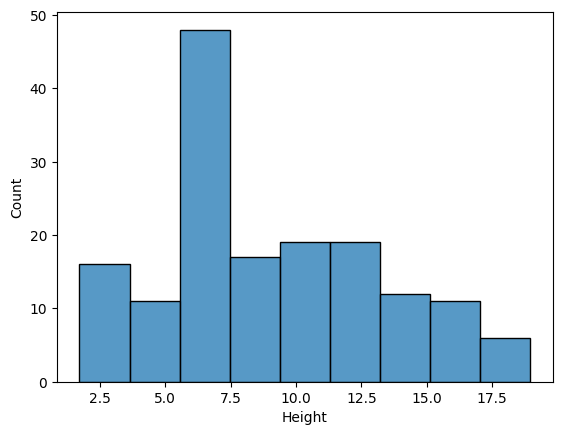

In [ ]:
# Height histogram
sns.histplot(data = fish, x = 'Height')
plt.show()

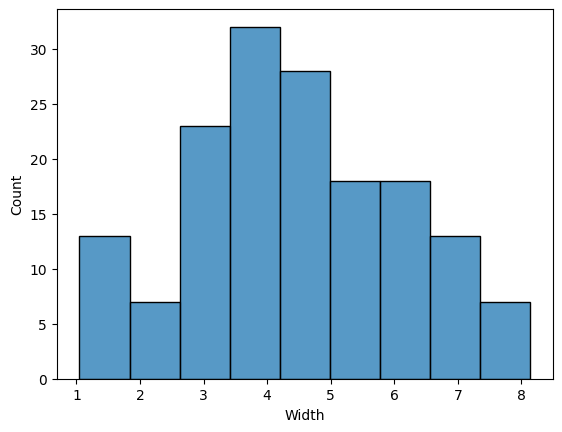

In [ ]:
# Width histogram
sns.histplot(data = fish, x = 'Width')
plt.show()

#### 오쌤 방법

In [ ]:
features  = fish.columns[1:]
features

Index(['Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

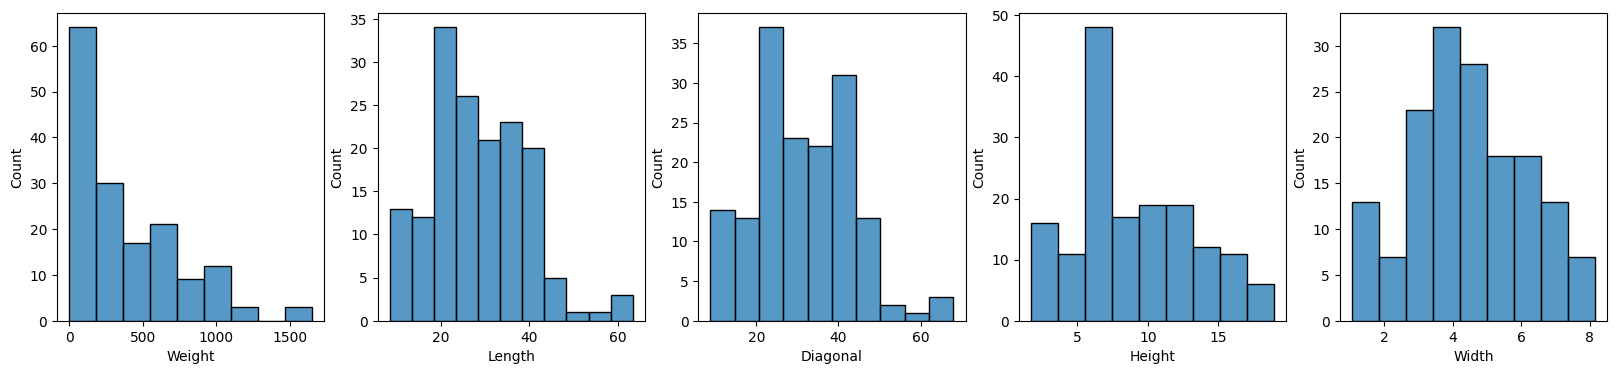

In [ ]:

fig, axes = plt.subplots(ncols=len(features), figsize=(20, 4))

for i, var in enumerate(features):
    sns.histplot(data=fish, x=var, ax=axes[i])

plt.show()


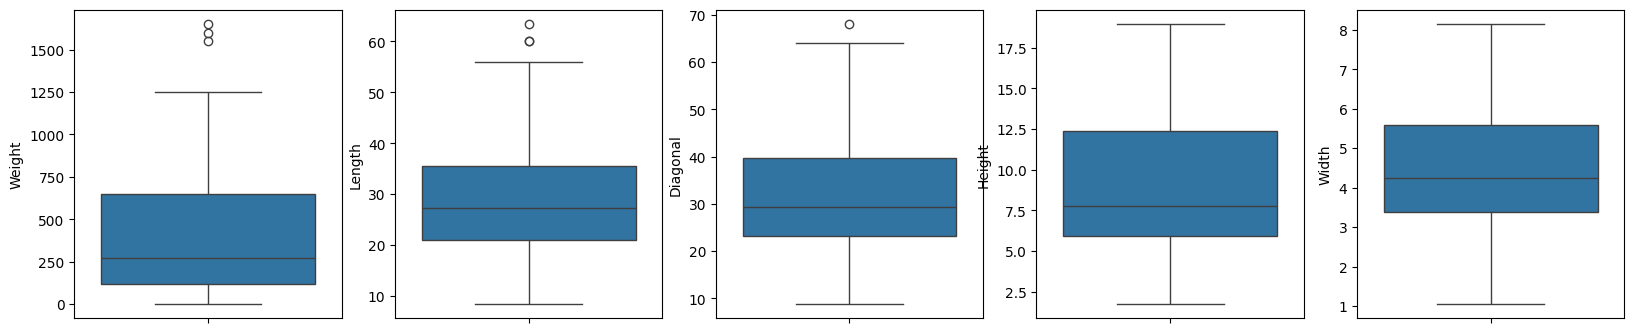

In [ ]:
fig, axes = plt.subplots(ncols=len(features), figsize=(20, 4))

for i, var in enumerate(features):
    sns.boxplot(data=fish, y=var, ax=axes[i])

plt.show()

## 변수들 간의 상관관계 시각화 pairplot

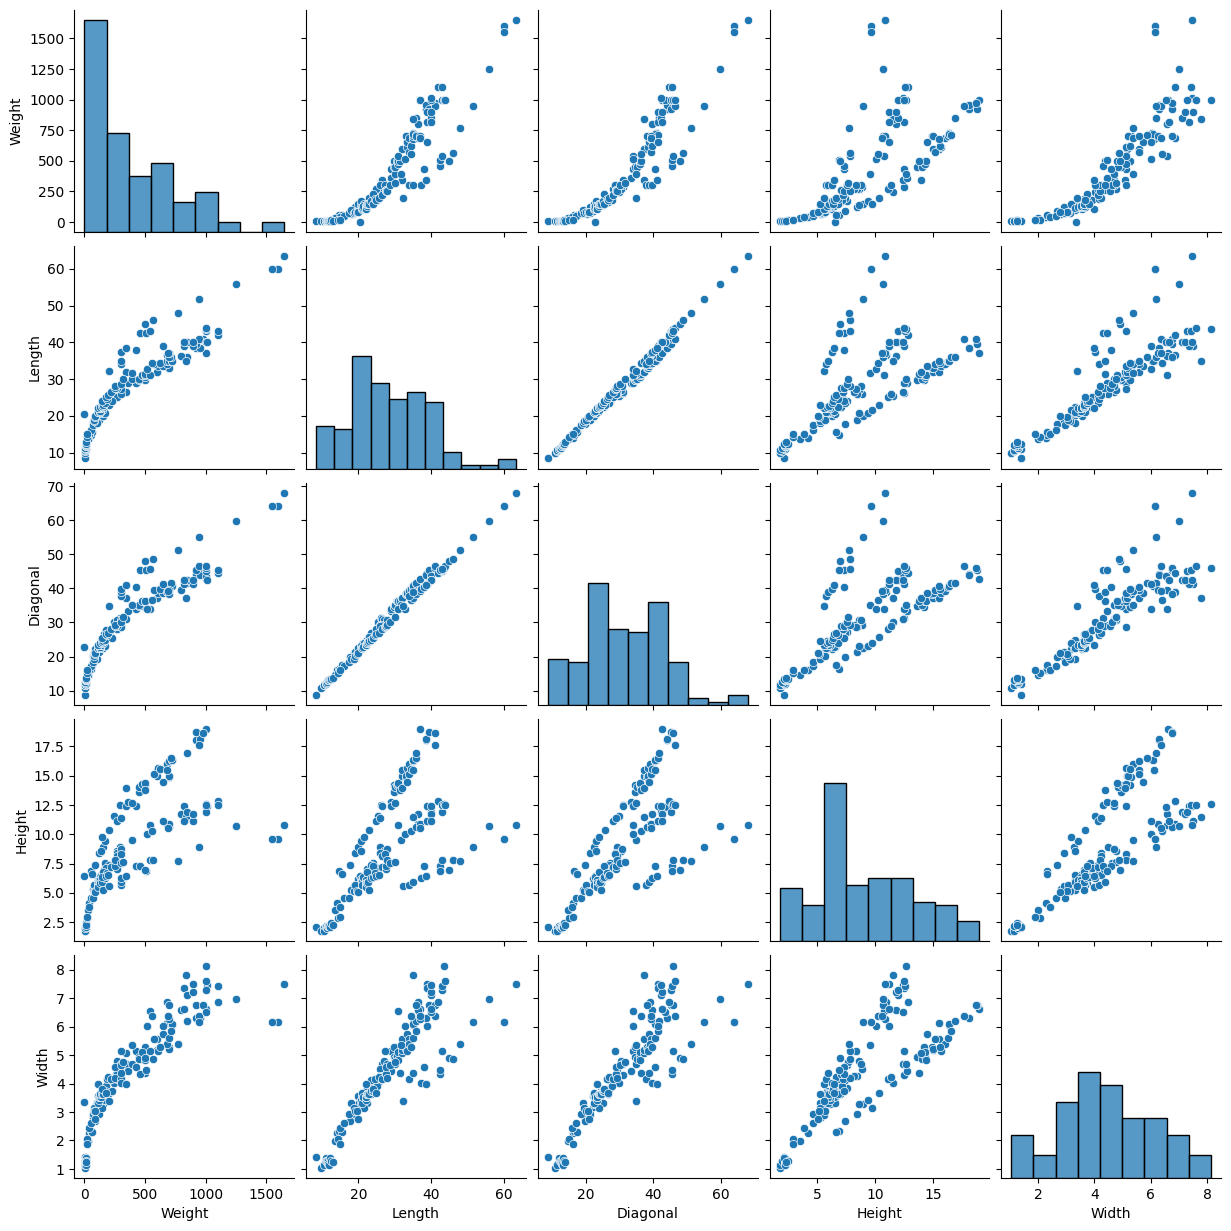

In [ ]:
sns.pairplot(data = fish)
plt.show()

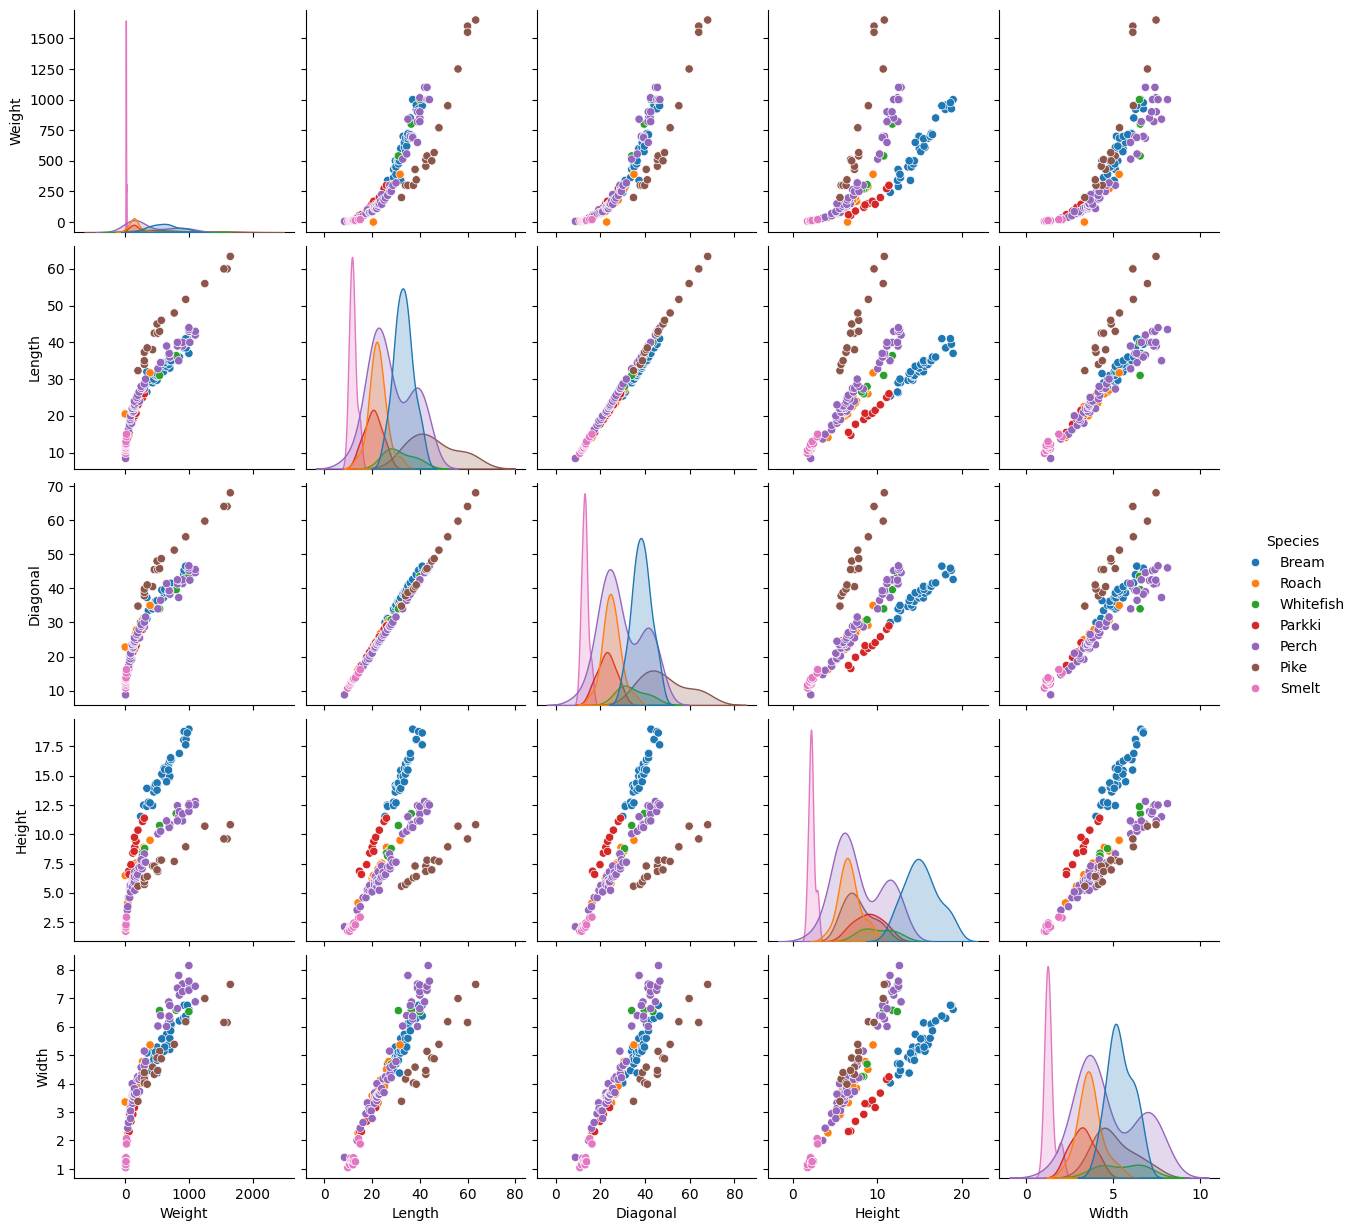

In [ ]:
sns.pairplot(data =fish, hue= 'Species')
plt.show()

# 문제 정의

2개의 변수를 사용한 2진 분류 문제
*   Bream(도미), Smelt(빙어) 분류 - 2진 분류 (binary class classification
*   특성(변수) - Weight(무게), Length(길이)

In [ ]:
# Jupyter 노트북에서 데이터프레임을 출력할 때 행을 최대 10개까지만 출력
pd.options.display.max_rows = 10

In [ ]:
# fish 데이터프레임에서 Bream고 Smelt를 선택, 3개 컬럼 선택.
df = fish.loc[fish.Species.isin(['Bream','Smelt']),['Species', 'Weight', 'Length']]

In [ ]:
df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [ ]:
df.Species.value_counts()

,count
Species,
Bream,35
Smelt,14


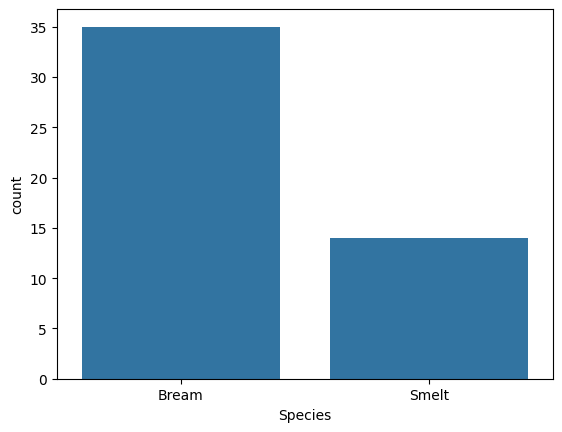

In [ ]:
sns.countplot(data = df,x = 'Species')
plt.show()

<Axes: xlabel='Length', ylabel='Weight'>

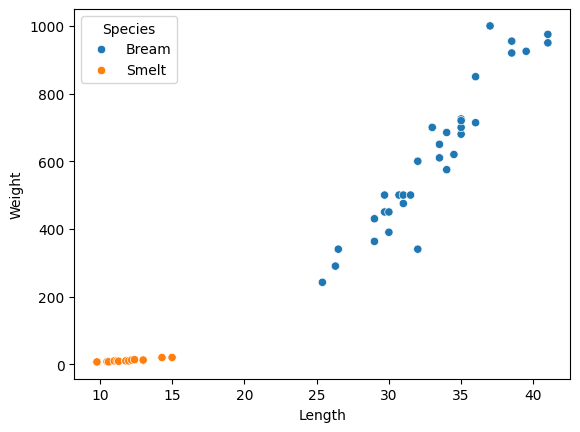

In [ ]:
sns.scatterplot(data = df , x='Length', y = 'Weight', hue= 'Species')

scikit-lean  패키지읭 머신러닝 알고리즘*클래스)들은 데이터 (특성, 변수)와 레이블(타겟) 배열을 구분해서 사용함

특성 배열은 2차원 ndarray. 티켓 배열은 1차원(ndarray)

In [ ]:
#  특성 배열 (2d array)
X = df[['Weight','Length']].values

In [ ]:
X[:5,:]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [ ]:
# 타겟 배열(1d array)
y = df['Species'].values

In [ ]:
y

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

# KNN 모델 훈련

KNN(K-Nearest Neighbors, k- 최근접 이웃) 알고리즘
*   k개의 가장 가까운 이웃들의 레이블을 사용해서 예측(분류)하는 머신 러닝 모델.
*   KNN 분류 모델은 학습시간이 필요하지않음.
*   KNN 블우 모델은 예측할 때 학습(훈련)데이터와 테스트 데이트 사이의 거리를 계산후 사장 가까운 k개의 거리를 찾기 때문에, 예측시간이 오래 걸릴 수 있음.

In [ ]:
# KNN 객체를 생성
# 파라미터 기본값: n_neighbors = 5(가장 가까운 이웃 5개 사용), metric = 'minkowski'(유클리드 기하학 최단 길이)
knn_clf = KNeighborsClassifier()

In [ ]:
# 모델 훈련(학습)
knn_clf.fit(X, y)

KNeighborsClassifier()

In [ ]:
# 훈련 셋의 에측값
train_pred = knn_clf.predict(X)

In [ ]:
# 훈련 셋의 예측값과 실젯값(타겟) 비교
train_pred == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
np.mean(train_pred == y)        #> 정확도

np.float64(1.0)

# 가상의 데이터 예측값

(600g, 30cm), (50g, 14cm) 가상의 물고기.

In [ ]:
X_test = np.array([
    [600, 30],
    [50, 14]
])

In [ ]:
X_test

array([[600,  30],
       [ 50,  14]])

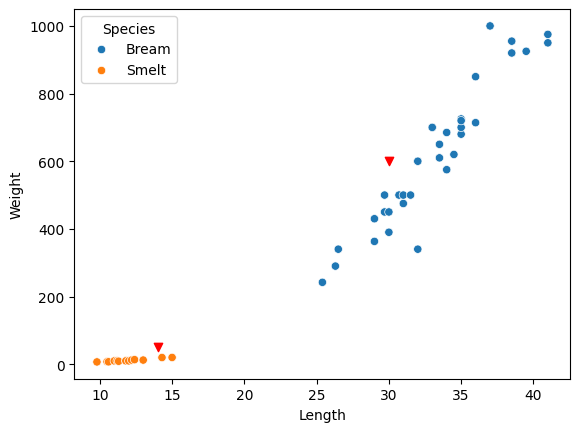

In [ ]:
# 훈련 셋 선점도 시각화
sns.scatterplot(data = df, x= 'Length', y = 'Weight', hue= 'Species')

# 테스트 셋(가상물고기) 시각화
plt.scatter( x= X_test[:,1], y = X_test[:,0], color = 'red', marker = 'v')

In [ ]:
# 가상의 물고기 예측값
test_predict = knn_clf.predict(X_test)

In [ ]:
test_predict

array(['Bream', 'Smelt'], dtype=object)

In [ ]:
distances , indices = knn_clf.kneighbors(X= X_test)
# 리턴값 distance: 가장 가까운 이웃 k개까지의 거리들
# 리턴값 indices: 가장 가까운 이웃 k개의 인덱스들.

In [ ]:
indices

array([[15, 14, 18, 22, 20],
       [48, 47, 45, 46, 44]])

In [ ]:
distances

array([[ 2.        ,  2.        , 10.59481005, 20.5       , 25.3179778 ],
       [30.11660671, 30.30148511, 36.63495598, 37.8132252 , 37.84283287]])

In [ ]:
y[indices[0]]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
y[indices[1]]

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'], dtype=object)

# k값에 따른 정확도

In [ ]:
# k = 1인 KNN 모델을 생성
knn_1 = KNeighborsClassifier(n_neighbors= 1)

# 모델을 훈련
knn_1.fit(X,y)

# 훈련 셋의 예측값
train_pred_1 = knn_1.predict(X)
print(train_pred_1)

# 훈련 셋 예측값의 정확도(accuracy)
acc_1 = knn_1.score(X,y)
print(acc_1)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt' 'Smelt'
 'Smelt' 'Smelt' 'Smelt' 'Smelt']
1.0


In [ ]:
accuracies = []         # k값 변화에 따른 정확도를 저장할 리스트.

# 1~49  반복
# KNN(K) 모델 생성 -> 훈련 -> 정확도 계산 -> 그정확도를 리스트에 추가

for i in range (1, 50):
    knn = KNeighborsClassifier(n_neighbors= i)      # 모델 생성
    knn.fit(X,y)            # 모델 훈련
    acc = knn.score(X,y)        # 훈련 셋에서의 정확도 계산
    accuracies.append(acc)          # 리스트에 정확도를 추가


In [ ]:
print(accuracies)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9795918367346939, 1.0, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143]


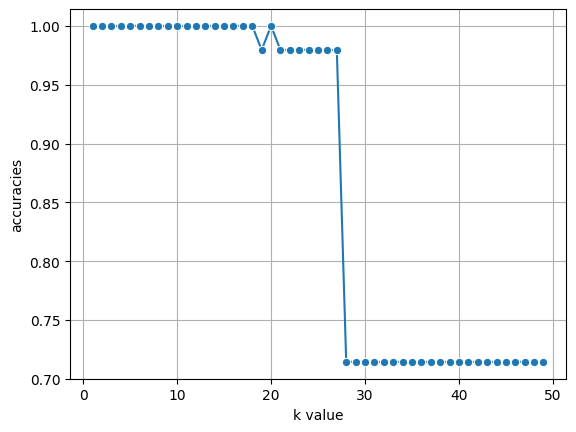

In [ ]:
k_values = np.arange(1,50)
sns.lineplot(x= k_values, y = accuracies, marker = 'o')
plt.xlabel('k value')
plt.ylabel('accuracies')
plt.grid()
plt.show()

In [ ]:
print(np.argmax(accuracies))            # np.argmax(arr): arr에서 최댓값의 인덱스
print(np.argmin(accuracies))            # np.argmin(arr): arr에서 최솟값의 인덱스

0
27


In [ ]:
k_values[np.argmax(accuracies)]

np.int64(1)

In [ ]:
k_values[np.argmin(accuracies)]

np.int64(28)

# KNN 연습

*   iris 데이터셋 사용
*   2진 분류: Setosa와 Setosa가 아닌 것으로 분류.
*   2개 특성 사용: sepal_length, sepal_width 변수(컬럼) 사용.
*   KNN 모델 생성, 훈련, 예측, 정확도
*   k값 변화에 따른 정확도 변화

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
notsetosa = iris.loc[iris.species.isin(['versicolor','virginica']),['sepal_length', 'sepal_width']]
notsetosa['species'] = 'notsetosa'
notsetosa

,sepal_length,sepal_width,species
50,7.0,3.2,notsetosa
51,6.4,3.2,notsetosa
52,6.9,3.1,notsetosa
53,5.5,2.3,notsetosa
54,6.5,2.8,notsetosa
...,...,...,...
145,6.7,3.0,notsetosa
146,6.3,2.5,notsetosa
147,6.5,3.0,notsetosa
148,6.2,3.4,notsetosa


In [ ]:
setosa = iris.loc[iris.species.isin(['setosa']),['sepal_length', 'sepal_width']]
setosa['species'] = 'setosa'

In [ ]:
df = pd.concat([setosa, notsetosa], axis = 0)
df

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
145,6.7,3.0,notsetosa
146,6.3,2.5,notsetosa
147,6.5,3.0,notsetosa
148,6.2,3.4,notsetosa


In [ ]:
df.species.value_counts()

,count
species,
notsetosa,100
setosa,50


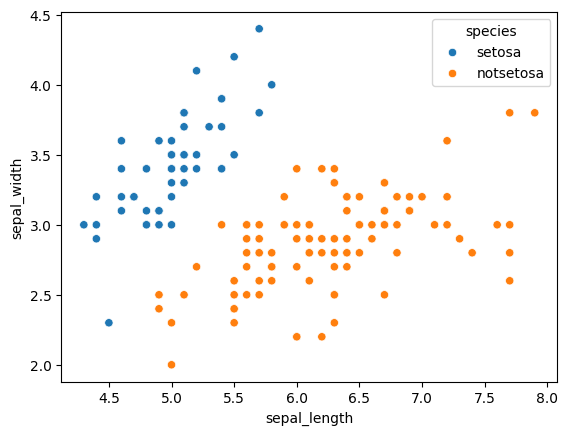

In [ ]:
sns.scatterplot(data = df, x = 'sepal_length', y = 'sepal_width', hue = 'species')
plt.show()

In [ ]:
X = df[['sepal_length', 'sepal_width']].values
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [ ]:
y = df['species'].values
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'notsetosa', 'notsetosa', 'notsetosa',
       'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa',
       'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa',
       'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa',
       'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa',
       'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa',
       'notsetosa', 'notsetosa', 'nots

In [ ]:
knn_clf = KNeighborsClassifier()

In [ ]:
knn_clf.fit(X,y)

KNeighborsClassifier()

In [ ]:
train_pred = knn_clf.predict(X)

In [ ]:
train_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'notsetosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'notsetosa', 'notsetosa', 'notsetosa',
       'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa',
       'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa',
       'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa',
       'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa',
       'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa', 'notsetosa',
       'notsetosa', 'notsetosa', 'n

In [ ]:
train_pred == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
np.mean(train_pred == y)

np.float64(0.9933333333333333)

In [ ]:
accuracies = []

for i in range(1,151):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X, y)
    acc = knn.score(X,y)
    accuracies.append(acc)

print(accuracies)

[1.0, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9933333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.98, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.98, 0.9866666666666667, 0.98, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9533333333333334, 0.9533333333333334, 0.94666666666

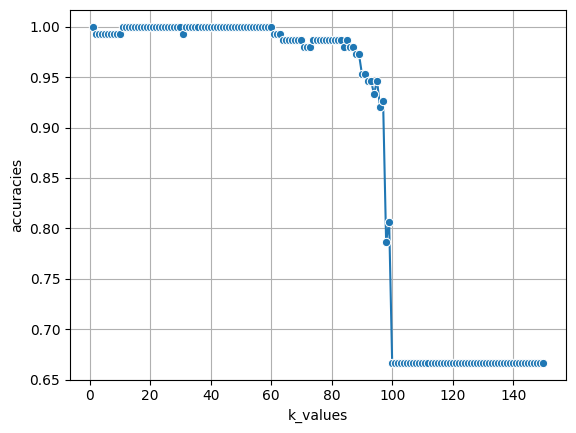

In [ ]:
k_values = np.arange(1,151)
sns.lineplot(x = k_values, y = accuracies, marker='o')
plt.xlabel('k_values')
plt.ylabel('accuracies')
plt.grid()
plt.show()

#### 오쌤 방법

In [ ]:
# y = 'setosa' if y == 'setosa' else 'not_setosa'를 numpy 함수로 쉽게 구하는 방법
# np.where(조건식, true_val, false_val)
# 배열의 원소들이 조건식을 만족하면 true_val로 변경, 조건식을 만족하지 않으면 false_val로 변경한 배열을 리턴
y = np.where(y == 'setosa', 'setosa', 'not_setosa')

In [ ]:
y[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [ ]:
y[-5:]

array(['not_setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_setosa'], dtype='<U10')

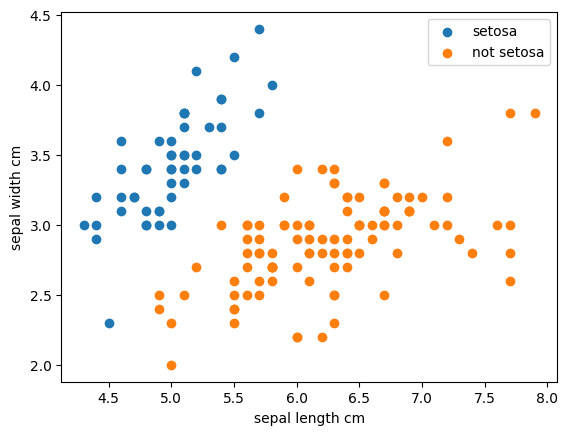

In [ ]:
plt.scatter(x = X[:50, 0], y = X[:50,1], label= 'setosa')
plt.scatter(x = X[50:, 0], y = X[50:,1], label = 'not setosa')

plt.xlabel('sepal length cm')
plt.ylabel('sepal width cm')
plt.legend()
plt.show()

In [ ]:
# 머신 러닝 모델 선택 - 생성자 호출
knn_clf = KNeighborsClassifier()

In [ ]:
# 모델 훈련
knn_clf.fit(X,y)

KNeighborsClassifier()

In [ ]:
# 예측값 계산
y_pred =knn_clf. predict(X)

In [ ]:
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'not_setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_s

In [ ]:
knn_clf.score(X,y)

0.9933333333333333

In [ ]:
# k 값에 따른 정확도 변화
accuracies = []         # 가장 가까운 이웃의 개수(k)
k_vlaues = np.arange(1,151)
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X,y)
    acc = knn.score(X,y)
    accuracies.append(acc)

print(accuracies)

[1.0, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9933333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9933333333333333, 0.9933333333333333, 0.9933333333333333, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.98, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.98, 0.9866666666666667, 0.98, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9533333333333334, 0.9533333333333334, 0.94666666666